In [2]:
from ucimlrepo import fetch_ucirepo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [3]:
wine_quality = fetch_ucirepo(id=186)

# Pre-processing
df = wine_quality.data.original

def categorize_quality(quality):
    if quality < 7:
        return 'low'
    else:
        return 'high'


df['quality_category'] = df['quality'].apply(categorize_quality)

red_wine_df = df[df['color'] == 'red']
white_wine_df = df[df['color'] == 'white']

df_array = [red_wine_df, white_wine_df, df]

In [6]:
def confusion_matrix_plot(y_test, y_pred, clf, model):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm, display_labels=clf.classes_)

    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for DataFrame {model.__class__.__name__}')
    plt.show()


def optimized_folds(model, X, y):
    best_score = 0
    best_folds = 0

    for folds in np.arange(2, 11):
        scores = cross_val_score(model, X, y, cv=folds, scoring='f1_macro')
        if scores.mean() > best_score:
            best_score = scores.mean()
            best_folds = folds

    print(f"Best Folds: {best_folds} | Best Score: {best_score}", end=" | ")
    return best_folds

Processing red wine...
Best K: 15
              precision    recall  f1-score   support

        high       0.50      0.06      0.11        67
         low       0.87      0.99      0.92       413

    accuracy                           0.86       480
   macro avg       0.68      0.53      0.52       480
weighted avg       0.82      0.86      0.81       480



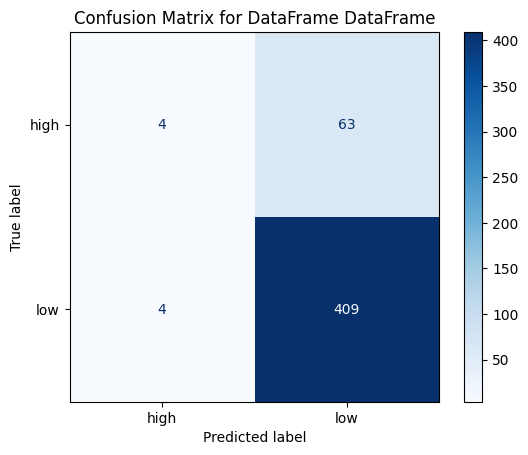

Processing white wine...
Best K: 1
              precision    recall  f1-score   support

        high       0.57      0.54      0.56       329
         low       0.87      0.88      0.87      1141

    accuracy                           0.80      1470
   macro avg       0.72      0.71      0.71      1470
weighted avg       0.80      0.80      0.80      1470



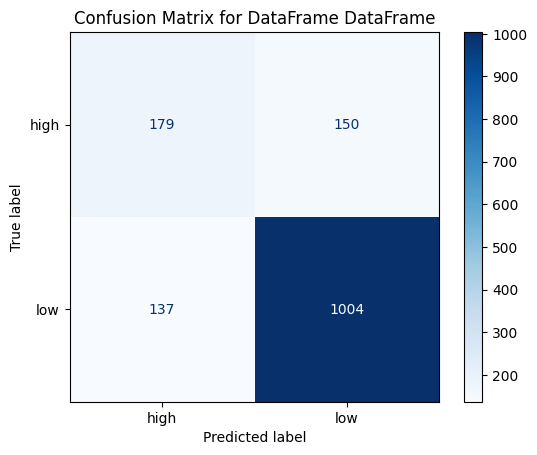

Processing red wine...
Best K: 1
              precision    recall  f1-score   support

        high       0.50      0.57      0.53       365
         low       0.90      0.87      0.88      1585

    accuracy                           0.81      1950
   macro avg       0.70      0.72      0.71      1950
weighted avg       0.82      0.81      0.82      1950



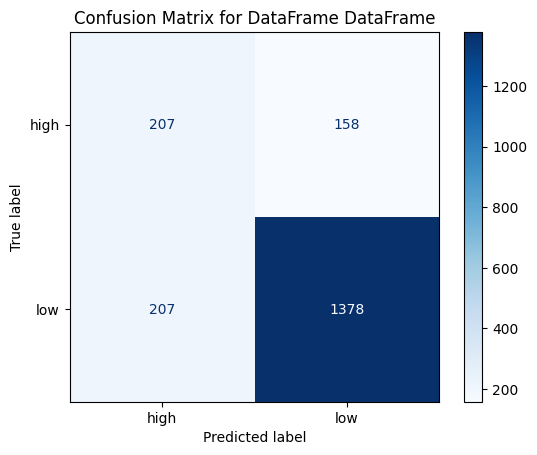

In [7]:
for df in df_array:
    print("=" * 40)
    print(f"Processing {df['color'].unique()[0]} wine...")
    print("=" * 40)

    X = df.drop(columns=['quality', 'quality_category', 'color'])
    y = df['quality_category']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # find optimized K value
    param_grid = {'n_neighbors': range(1, 20)}
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    print(f"Best K: {grid_search.best_params_['n_neighbors']}")

    knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    print(classification_report(y_test, y_pred))
    confusion_matrix_plot(y_test, y_pred, knn, df)


In [16]:
# confusion matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred, labels=knn.classes_)

array([[ 13,  54],
       [ 14, 399]])